# Twitter and WordCloud

In [3]:
# Replacement for time magic
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2021-02-08 23:46:36 -00:00)


### Imports

In [24]:
# Modules in use now
import twitter
import tweepy, random
from tweepy import OAuthHandler

# NLP processing
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import re

# Data visuals
import matplotlib.pyplot as plt

# Collecting words
import collections
# Counting words
import numpy as np
# Load colour map
from matplotlib import cm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...


time: 875 ms (started: 2021-02-08 23:48:30 -00:00)


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [26]:
search_term = input("Search on Twitter:")
_punctuation = list(punctuation) + ["``", "'s", "'", ".", '"', "n't", ]
extrawords = [w for w in STOPWORDS if w not in stopwords.words('english')]
stop_words = set(stopwords.words('english') + ['AT_USER', 'URL', 'rt',
                                               search_term.lower(), 'president'] + _punctuation + extrawords)

Search on Twitter:George
time: 2.98 s (started: 2021-02-08 23:48:36 -00:00)


## Constants

In [27]:
CONSUMER_KEY = 'YOUR_KEY'
CONSUMER_SECRET = 'YOUR_KEY'
ACCESS_TOKEN_KEY = 'YOUR_KEY'
ACCESS_TOKEN_SECRET = 'YOUR_KEY'


time: 0 ns (started: 2021-02-08 23:48:40 -00:00)


#### Getting tweets from search term

In [28]:
twitter_api = twitter.Api(consumer_key=CONSUMER_KEY,
                          consumer_secret=CONSUMER_SECRET,
                          access_token_key=ACCESS_TOKEN_KEY,
                          access_token_secret=ACCESS_TOKEN_SECRET)

time: 0 ns (started: 2021-02-08 23:48:40 -00:00)


In [29]:
def get_searchterm_tweets(search_keyword):
    try:
        tweets_fetched = twitter_api.GetSearch(search_keyword, count=100, lang="en")
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        return [status.text for status in tweets_fetched]
    except:
        return None
    pass

time: 0 ns (started: 2021-02-08 23:48:40 -00:00)


In [30]:
%%time
searchterm_tweets = get_searchterm_tweets(search_term)
searchterm_tweets[:4]

Fetched 100 tweets for the term George
Wall time: 950 ms


['Was once told by George Shultz that after President Reagan showed up unprepared for a conversation at White House w… https://t.co/P6GbHPHLsg',
 'Heartfelt condolences to the family of Secretary George Shultz. He was a true Marine by countenance, determination… https://t.co/a28RCkTotL',
 'Aside from George, no one is more responsible for the success of those films than John Williams. 🎼\n#HBD_Maestro 🎂 https://t.co/KEsnw9OS7q',
 'I’ve decided I shall just draw both because indecision go brrrr (and I’m gonna continue watching the George vod)']

time: 954 ms (started: 2021-02-08 23:48:41 -00:00)


### Get tweets from timeline 

In [31]:
%%time
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# Define access api
api = tweepy.API(auth)

# Get tweets
timeline_tweets = []
for status in api.user_timeline():
    timeline_tweets.append(api.get_status(status.id).text)

Wall time: 5.4 s
time: 5.39 s (started: 2021-02-08 23:48:43 -00:00)


In [32]:
timeline_tweets[:4]

['Thank you @macmiller for spending 1,243 minutes with me this year on @Spotify. You are my #1. #2020Wrapped https://t.co/CHUvgCKDxg',
 'RT @ianrborthwick: Clout never dies https://t.co/jcLbVPZ2vY',
 'RT @AstroVicGlover: My first video from space! Looking at the Earth through the window of Dragon Resilience. The scale of detail and sensor…',
 'RT @JamesBlunt: https://t.co/wbv71efA68']

time: 16 ms (started: 2021-02-08 23:48:48 -00:00)


## Processing Tweets

###### Helper function

In [33]:
def processTweets(DataSet):
    word_soup = []
    i = 0
    while i < len(DataSet):
        tweet = DataSet[i]
        tweet = tweet.lower()  # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)  # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet)  # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)  # remove the # in #hashtag
        tweet = word_tokenize(tweet)  # remove repeated characters (helloooooooo into hello)
        for word in tweet:
            if word not in stop_words:
                word_soup.append(word)  # append each word in each tweet to new word set

        i += 1
    return word_soup

time: 15 ms (started: 2021-02-08 23:48:49 -00:00)


### Analysing tweets from search term

In [34]:
searchterm_wordsoup = processTweets(searchterm_tweets)
s_tag_words = nltk.pos_tag(searchterm_wordsoup)
s_nouns = []
for word in s_tag_words:  # Extra bit to extract the most useful word type from the word soup, which is nouns
    if word[1] == 'NNS' or word[1] == 'NN':
        s_nouns.append(word[0])

time: 250 ms (started: 2021-02-08 23:48:53 -00:00)


In [35]:
all_s_nouns = ' '.join(s_nouns)

# Generate word cloud
s_wordcloud = WordCloud(font_path='orange juice 2.0.ttf', stopwords=stop_words,
                      background_color="black", max_words=3000,
                      width=1800, height=1400).generate(all_s_nouns)

Wall time: 7.31 s
time: 7.31 s (started: 2021-02-08 23:48:54 -00:00)


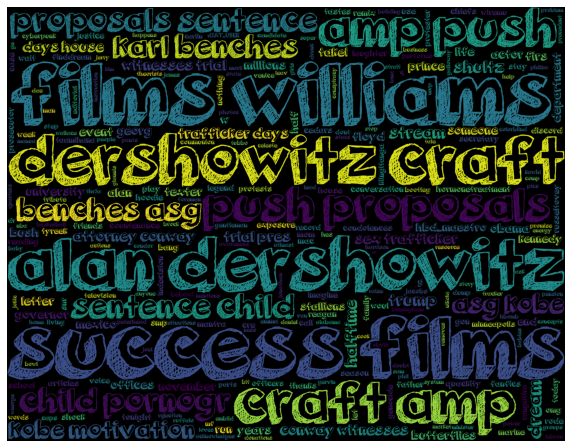

Wall time: 1.46 s
time: 1.45 s (started: 2021-02-08 23:49:02 -00:00)


In [36]:
plt.figure(figsize=(10, 20))
plt.imshow(s_wordcloud)
plt.axis("off")
plt.show()

In [39]:
counted_s_words = collections.Counter(s_nouns)

time: 0 ns (started: 2021-02-08 23:49:11 -00:00)


In [40]:
s_words = []
s_counts = []
for letter, count in counted_s_words.most_common(10):
    s_words.append(letter)
    s_counts.append(count)

time: 0 ns (started: 2021-02-08 23:49:12 -00:00)


<BarContainer object of 10 artists>

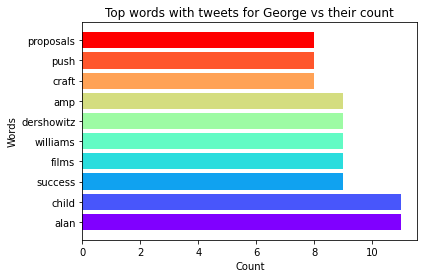

time: 203 ms (started: 2021-02-08 23:49:14 -00:00)


In [41]:
colours = cm.rainbow(np.linspace(0, 1, 10))
plt.title(f'Top words with tweets for {search_term} vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(s_words,s_counts, color=colours)

### Analysing tweets from timeline

In [42]:
timeline_wordsoup = processTweets(timeline_tweets)
t_tag_words = nltk.pos_tag(timeline_wordsoup)
t_nouns = []
for word in t_tag_words:  # Extra bit to extract the most useful word type from the word soup, which is nouns
    if word[1] == 'NNS' or word[1] == 'NN' or word[1] == 'JJ':
        t_nouns.append(word[0])

time: 16 ms (started: 2021-02-08 23:49:15 -00:00)


In [44]:
all_t_tweets = ' '.join(t_nouns)

# Generate WordCloud
t_wordcloud = WordCloud(font_path='GatsbyFLF-BoldItalic.ttf', stopwords=STOPWORDS, background_color='black', mask=None,
                      max_words=500, width=1800, height=1400).generate(all_t_tweets)

time: 3.06 s (started: 2021-02-08 23:49:35 -00:00)


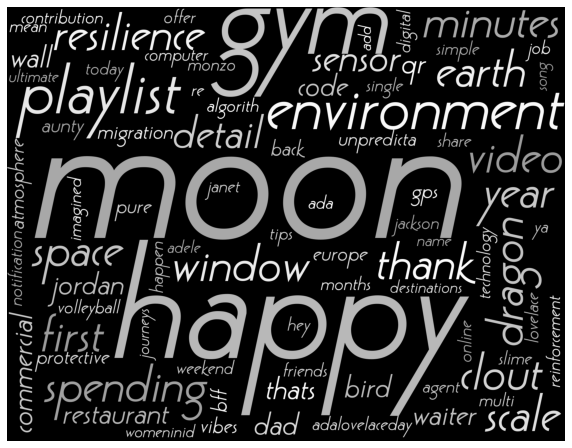

time: 594 ms (started: 2021-02-08 23:49:39 -00:00)


In [45]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

plt.figure(figsize=(10, 20))
plt.imshow(t_wordcloud.recolor(color_func=grey_color_func, random_state=3))
plt.axis('off')
plt.show()

In [46]:
counted_t_words = collections.Counter(t_nouns)

time: 0 ns (started: 2021-02-08 23:49:39 -00:00)


In [47]:
t_words = []
t_counts = []
for letter, count in counted_t_words.most_common(10):
    t_words.append(letter)
    t_counts.append(count)

time: 0 ns (started: 2021-02-08 23:49:39 -00:00)


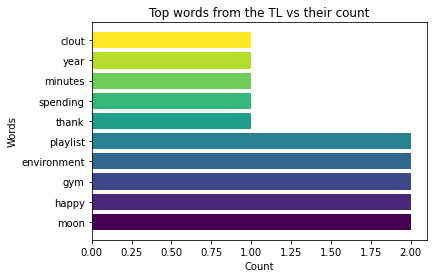

time: 188 ms (started: 2021-02-08 23:49:39 -00:00)


In [48]:
colours = cm.viridis(np.linspace(0, 1, 10))
plt.title('Top words from the TL vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(t_words, t_counts, color=colours)
plt.show()